In [4]:
import pathlib, os, sys, operator, re, datetime
from functools import reduce
import numpy as np
import tensorflow as tf
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
import tensorflow_datasets as tfds
from tiny_imagenet import TinyImagenetDataset

# Enable or disable GPU
# To fully disable it, we need to hide all GPU devices from Tensorflow
# Make sure GPU is disabled for this inference part of the lab
ENABLE_GPU = False
# tf.debugging.set_log_device_placement(True)

if not ENABLE_GPU:
    tf.config.set_visible_devices([], 'GPU')

# Print Python and TF version, and where we are running
print(f'Running on Python Version: {sys.version}')
print(f'Using Tensorflow Version: {tf. __version__}')
if not tf.config.experimental.list_physical_devices("GPU"):
    print('Running on CPU')
else:
    print(f'Using GPU at: {tf.test.gpu_device_name()} (of {len(tf.config.experimental.list_physical_devices("GPU"))} available)')


Running on Python Version: 3.6.8 (default, Aug 13 2020, 07:46:32) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]
Using Tensorflow Version: 2.6.2
Running on CPU


In [5]:


# Normalize the images
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

# Original Source: https://github.com/ksachdeva/tiny-imagenet-tfds
# Class Version Source: https://github.com/Mluckydwyer/tiny-imagenet-tfds
# Setup our dataset
# ---------------------------------------------------------

tiny_imagenet_builder = TinyImagenetDataset()

# this call (download_and_prepare) will trigger the download of the dataset
# and preparation (conversion to tfrecords)
#
# This will be done only once and on next usage tfds will
# use the cached version on your host.
tiny_imagenet_builder.download_and_prepare(download_dir="~/tensorflow-datasets/downloads")

# class_names = tiny_imagenet_builder.info.features['label'].names
ds = tiny_imagenet_builder.as_dataset()
ds_train, ds_val = ds["train"], ds["validation"]
assert(isinstance(ds_train, tf.data.Dataset))
assert(isinstance(ds_val, tf.data.Dataset))

# Training Dataset
# ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.shuffle(1024).prefetch(tf.data.AUTOTUNE)


# Validation Dataset
# ds_val = ds_val.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_val_small = ds_val.shuffle(1024).prefetch(tf.data.AUTOTUNE)


# Dataset metadata
ds_info = tiny_imagenet_builder.info

In [7]:
# We need to read the "human readable" labels so we can translate with the numeric values
# Read the labels file (words.txt)
with open(os.path.abspath('wnids.txt'), 'r') as f:
    wnids = [x.strip() for x in f]

# Map wnids to integer labels
wnid_to_label = {wnid: i for i, wnid in enumerate(wnids)}
label_to_wnid = {v: k for k, v in wnid_to_label.items()}

# Use words.txt to get names for each class
with open(os.path.abspath('words.txt'), 'r') as f:
    wnid_to_words = dict(line.split('\t') for line in f)
    for wnid, words in wnid_to_words.items():
        wnid_to_words[wnid] = [w.strip() for w in words.split(',')]
        
class_names = [str(wnid_to_words[wnid]) for wnid in wnids]

FileNotFoundError: [Errno 2] No such file or directory: '/home/kenkelj/cpre587/Lab4/wnids.txt'

In [8]:
hist_data = np.arange(1)
for img_idx, img in enumerate(ds_train.batch(1)):
    data = np.asarray(img["image"]).astype('float32').flatten() / 255.0
    hist_data = np.concatenate([hist_data, data], axis = 0)
    


KeyboardInterrupt: 

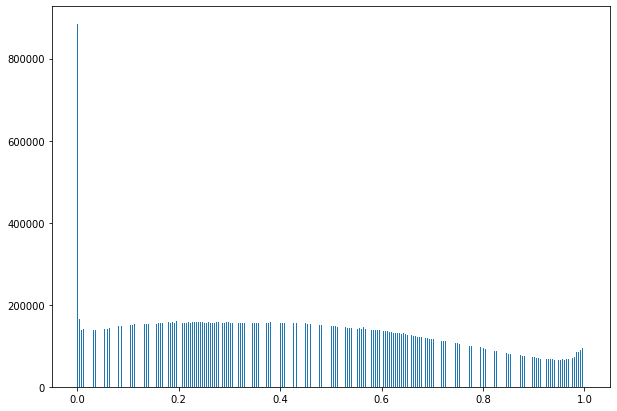

In [9]:
bin_num = 800;

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(hist_data, bins = bin_num)
 
# Show plot
plt.show()

OSError: SavedModel file does not exist at: /home/kenkelj/cpre587/Lab4/CNN_TinyImageNet_2.h5/{saved_model.pbtxt|saved_model.pb}

In [7]:
from keras import backend as K

# model_path = os.path.abspath(""/home/dwyer/482/dev/CNN_TinyImageNet_2.h5)" # Uncomment this to use a non-relative path
model_path = os.path.abspath("CNN_TinyImageNet_2.h5")

# TODO: Your Code Here
model = tf.keras.models.load_model(model_path)

# model
# get_relu_output = K.function([model.layers[0].input], [model.layers[0].output])
ds_val_small = ds_val.shuffle(1024).prefetch(tf.data.AUTOTUNE)



for img_idx, img in enumerate(ds_val_small.batch(1)):
    get_relu_output = K.function([model.layers[0].input], [model.layers[0].output])
    relu_output = get_relu_output([img])
    print(relu_output)


NameError: name 'model' is not defined